### Clutstering for comments


In [1]:
#pip install --upgrade threadpoolctl

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the YouTube comments data into a Pandas dataframe
data = pd.read_csv("cleaned_comments.csv")




In [3]:
data

,Unnamed: 0.1,Unnamed: 0,Commented by,Comment,Likecount,Time
0,0,0,Caleb Curry,what is your secret to being productive<br>be ...,6,2023-04-17T20:10:07Z
1,1,1,Muwaffaq Bellah M.A,caleb you are awesome really i love your conte...,0,2023-04-20T01:35:52Z
2,2,2,Gustavo Foss,as you roll out the paid courses will you dele...,0,2023-04-19T14:30:15Z
3,3,3,Piotr Adamczyk,do daily quests here are exaples of quests to ...,0,2023-04-19T13:00:37Z
4,4,4,Ubaldo Von Calvo,hey caleb thanks for your beginner and 39;s gu...,0,2023-04-19T02:30:24Z
...,...,...,...,...,...,...
24713,24713,24713,aproe,hey caleb can you invite me,2,2020-11-08T04:19:54Z
24714,24714,24714,Leblex,you and 39;re first video,3,2019-12-08T17:31:02Z
24715,24715,24715,Caleb Curry,watch series with autoplay <a href= and ;list=...,2,2014-07-05T18:00:11Z
24716,24716,24716,Caleb Curry,no problem be sure to add me to a circle,2,2011-07-16T05:07:19Z


In [4]:
data= data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [5]:
data

,Commented by,Comment,Likecount,Time
0,Caleb Curry,what is your secret to being productive<br>be ...,6,2023-04-17T20:10:07Z
1,Muwaffaq Bellah M.A,caleb you are awesome really i love your conte...,0,2023-04-20T01:35:52Z
2,Gustavo Foss,as you roll out the paid courses will you dele...,0,2023-04-19T14:30:15Z
3,Piotr Adamczyk,do daily quests here are exaples of quests to ...,0,2023-04-19T13:00:37Z
4,Ubaldo Von Calvo,hey caleb thanks for your beginner and 39;s gu...,0,2023-04-19T02:30:24Z
...,...,...,...,...
24713,aproe,hey caleb can you invite me,2,2020-11-08T04:19:54Z
24714,Leblex,you and 39;re first video,3,2019-12-08T17:31:02Z
24715,Caleb Curry,watch series with autoplay <a href= and ;list=...,2,2014-07-05T18:00:11Z
24716,Caleb Curry,no problem be sure to add me to a circle,2,2011-07-16T05:07:19Z


In [6]:
print(data['Time'].dtype)

object


In [7]:
data['Time'] = pd.to_datetime(data['Time'])

In [8]:
print(data['Time'].dtype)

datetime64[ns, UTC]


In [9]:
from datetime import datetime
# Extract year, month, day, hour, minute, second, and weekday components
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second


In [10]:
data

,Commented by,Comment,Likecount,Time,Year,Month,Day,Hour,Minute,Second
0,Caleb Curry,what is your secret to being productive<br>be ...,6,2023-04-17 20:10:07+00:00,2023,4,17,20,10,7
1,Muwaffaq Bellah M.A,caleb you are awesome really i love your conte...,0,2023-04-20 01:35:52+00:00,2023,4,20,1,35,52
2,Gustavo Foss,as you roll out the paid courses will you dele...,0,2023-04-19 14:30:15+00:00,2023,4,19,14,30,15
3,Piotr Adamczyk,do daily quests here are exaples of quests to ...,0,2023-04-19 13:00:37+00:00,2023,4,19,13,0,37
4,Ubaldo Von Calvo,hey caleb thanks for your beginner and 39;s gu...,0,2023-04-19 02:30:24+00:00,2023,4,19,2,30,24
...,...,...,...,...,...,...,...,...,...,...
24713,aproe,hey caleb can you invite me,2,2020-11-08 04:19:54+00:00,2020,11,8,4,19,54
24714,Leblex,you and 39;re first video,3,2019-12-08 17:31:02+00:00,2019,12,8,17,31,2
24715,Caleb Curry,watch series with autoplay <a href= and ;list=...,2,2014-07-05 18:00:11+00:00,2014,7,5,18,0,11
24716,Caleb Curry,no problem be sure to add me to a circle,2,2011-07-16 05:07:19+00:00,2011,7,16,5,7,19


In [11]:
data= data.drop(['Time'], axis=1)

In [12]:
import calendar
# Define a function to convert month number to month name
def get_month_name(month_num):
    return calendar.month_name[month_num]

# Apply the function to the 'Month' column and create a new column 'Month Name'
data['Month'] = data['Month'].apply(get_month_name)

In [13]:
data

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second
0,Caleb Curry,what is your secret to being productive<br>be ...,6,2023,April,17,20,10,7
1,Muwaffaq Bellah M.A,caleb you are awesome really i love your conte...,0,2023,April,20,1,35,52
2,Gustavo Foss,as you roll out the paid courses will you dele...,0,2023,April,19,14,30,15
3,Piotr Adamczyk,do daily quests here are exaples of quests to ...,0,2023,April,19,13,0,37
4,Ubaldo Von Calvo,hey caleb thanks for your beginner and 39;s gu...,0,2023,April,19,2,30,24
...,...,...,...,...,...,...,...,...,...
24713,aproe,hey caleb can you invite me,2,2020,November,8,4,19,54
24714,Leblex,you and 39;re first video,3,2019,December,8,17,31,2
24715,Caleb Curry,watch series with autoplay <a href= and ;list=...,2,2014,July,5,18,0,11
24716,Caleb Curry,no problem be sure to add me to a circle,2,2011,July,16,5,7,19


In [14]:
data.isnull().sum()

Commented by      2
Comment         106
Likecount         0
Year              0
Month             0
Day               0
Hour              0
Minute            0
Second            0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
import nltk.stem as stemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [17]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
processed_comments = data['Comment'].map(preprocess)
processed_comments[:10]

0           [secret, productive, notify, course, href]
1                      [caleb, awesome, love, content]
2    [roll, pay, course, delete, program, tutorials...
3    [daily, quest, exaples, quest, follo, video, r...
4    [caleb, thank, beginner, guide, gateway, progr...
5                                [like, minutes, drop]
6    [video, great, advice, crash, course, idea, gr...
7                      [come, live, sell, learn, code]
8                                               [best]
9                                 [hours, days, weeks]
Name: Comment, dtype: object

In [19]:
data['Comment']=processed_comments

C:\Users\user\AppData\Local\Temp\ipykernel_12228\1578802602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comment']=processed_comments


In [20]:
data

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second
0,Caleb Curry,"[secret, productive, notify, course, href]",6,2023,April,17,20,10,7
1,Muwaffaq Bellah M.A,"[caleb, awesome, love, content]",0,2023,April,20,1,35,52
2,Gustavo Foss,"[roll, pay, course, delete, program, tutorials...",0,2023,April,19,14,30,15
3,Piotr Adamczyk,"[daily, quest, exaples, quest, follo, video, r...",0,2023,April,19,13,0,37
4,Ubaldo Von Calvo,"[caleb, thank, beginner, guide, gateway, progr...",0,2023,April,19,2,30,24
...,...,...,...,...,...,...,...,...,...
24713,aproe,"[caleb, invite]",2,2020,November,8,4,19,54
24714,Leblex,[video],3,2019,December,8,17,31,2
24715,Caleb Curry,"[watch, series, autoplay, href, list, invite, ...",2,2014,July,5,18,0,11
24716,Caleb Curry,"[problem, sure, circle]",2,2011,July,16,5,7,19


In [21]:
sen=[]
for my_list in data['Comment']:
    my_sentence = ' '.join(my_list)
    sen.append(my_sentence)
    

In [138]:
#sen

In [23]:
data['Comment']=pd.Series(sen)

C:\Users\user\AppData\Local\Temp\ipykernel_12228\1967331871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comment']=pd.Series(sen)


In [24]:
data

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second
0,Caleb Curry,secret productive notify course href,6,2023,April,17,20,10,7
1,Muwaffaq Bellah M.A,caleb awesome love content,0,2023,April,20,1,35,52
2,Gustavo Foss,roll pay course delete program tutorials upload,0,2023,April,19,14,30,15
3,Piotr Adamczyk,daily quest exaples quest follo video realise ...,0,2023,April,19,13,0,37
4,Ubaldo Von Calvo,caleb thank beginner guide gateway program lan...,0,2023,April,19,2,30,24
...,...,...,...,...,...,...,...,...,...
24713,aproe,NaN,2,2020,November,8,4,19,54
24714,Leblex,NaN,3,2019,December,8,17,31,2
24715,Caleb Curry,NaN,2,2014,July,5,18,0,11
24716,Caleb Curry,NaN,2,2011,July,16,5,7,19


In [25]:
data.isnull().sum()

Commented by      0
Comment         108
Likecount         0
Year              0
Month             0
Day               0
Hour              0
Minute            0
Second            0
dtype: int64

In [26]:
data.dropna()

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second
0,Caleb Curry,secret productive notify course href,6,2023,April,17,20,10,7
1,Muwaffaq Bellah M.A,caleb awesome love content,0,2023,April,20,1,35,52
2,Gustavo Foss,roll pay course delete program tutorials upload,0,2023,April,19,14,30,15
3,Piotr Adamczyk,daily quest exaples quest follo video realise ...,0,2023,April,19,13,0,37
4,Ubaldo Von Calvo,caleb thank beginner guide gateway program lan...,0,2023,April,19,2,30,24
...,...,...,...,...,...,...,...,...,...
24605,Dont Mind 8,caleb invite,0,2017,December,14,10,33,28
24606,Nihal Bharvani,video,0,2017,November,26,1,12,38
24607,Alex Jones,watch series autoplay href list invite people ...,0,2017,November,17,1,49,45
24608,Mark S.,problem sure circle,0,2017,November,10,14,24,12


In [27]:
processed_comments = data.to_csv('processed_comments.csv', index = True)



In [28]:
len(sen)

24610

In [29]:
sen[0]

'secret productive notify course href'

In [30]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(data['Comment'][:1000].values.astype('U'))

In [31]:
print(tfidf_matrix)

  (0, 818)	0.20829901158336064
  (0, 371)	0.23869316591785605
  (0, 1167)	0.4785325718312217
  (0, 1325)	0.5790698023615557
  (0, 1511)	0.5790698023615557
  (1, 350)	0.3803127320992756
  (1, 1029)	0.5277642013003695
  (1, 110)	0.631694667281502
  (1, 200)	0.4216503539155162
  (2, 1854)	0.37424685839630034
  (2, 1807)	0.30551332841341877
  (2, 1332)	0.31046049864059233
  (2, 419)	0.4083476608299497
  (2, 1239)	0.48168689610725574
  (2, 1469)	0.48168689610725574
  (2, 371)	0.1985518321696194
  (3, 1117)	0.12594339468859952
  (3, 754)	0.11811419391637755
  (3, 1061)	0.10641020556698261
  (3, 919)	0.10641020556698261
  (3, 1734)	0.04974115534960632
  (3, 1320)	0.13149830103874857
  (3, 1597)	0.11513766992600705
  (3, 726)	0.07836839672176024
  (3, 1743)	0.26299660207749714
  :	:
  (996, 1881)	0.12320582294907473
  (996, 1750)	0.14686651059258438
  (996, 1518)	0.21506243038004838
  (996, 726)	0.1281697005271816
  (996, 993)	0.11744815823521114
  (996, 1246)	0.3375118165531157
  (997, 207)	0

In [32]:
# Reduce the dimensionality of the TF-IDF matrix using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_matrix.toarray())

In [33]:
print(X_pca)

[[ 0.08282745 -0.06162006]
 [-0.12411627 -0.064744  ]
 [-0.11593533 -0.09741782]
 ...
 [-0.17051818  0.0704591 ]
 [ 0.1490167  -0.05333005]
 [-0.15692197 -0.0862595 ]]


In [34]:
type(X_pca)

numpy.ndarray

In [35]:
# Determine the optimal number of clusters using the elbow method
from sklearn.metrics import silhouette_score
scores = []
k_range = range(2, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    scores.append(score)
    

In [36]:
scores

[0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053,
 0.8091251159529053]

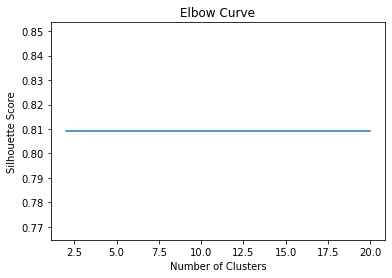

In [37]:
# Plot elbow curve to identify optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve')
plt.show()


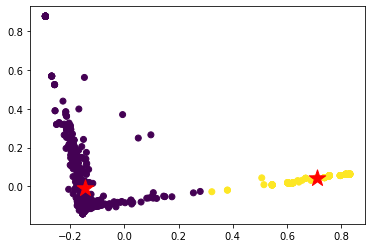

In [38]:
# Visualize the clusters
import matplotlib.pyplot as plt
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')
plt.show()


In [39]:
# Assign each comment to a cluster based on its nearest centroid
distances = kmeans.transform(X_pca)
nearest_cluster = np.argmin(distances, axis=1)

In [40]:
labels = kmeans.labels_

In [41]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [42]:
df_1000 = data['Comment'].iloc[:1000]

In [43]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_1000.values.astype('U'))

In [44]:
print(tfidf_matrix)

  (0, 818)	0.20829901158336064
  (0, 371)	0.23869316591785605
  (0, 1167)	0.4785325718312217
  (0, 1325)	0.5790698023615557
  (0, 1511)	0.5790698023615557
  (1, 350)	0.3803127320992756
  (1, 1029)	0.5277642013003695
  (1, 110)	0.631694667281502
  (1, 200)	0.4216503539155162
  (2, 1854)	0.37424685839630034
  (2, 1807)	0.30551332841341877
  (2, 1332)	0.31046049864059233
  (2, 419)	0.4083476608299497
  (2, 1239)	0.48168689610725574
  (2, 1469)	0.48168689610725574
  (2, 371)	0.1985518321696194
  (3, 1117)	0.12594339468859952
  (3, 754)	0.11811419391637755
  (3, 1061)	0.10641020556698261
  (3, 919)	0.10641020556698261
  (3, 1734)	0.04974115534960632
  (3, 1320)	0.13149830103874857
  (3, 1597)	0.11513766992600705
  (3, 726)	0.07836839672176024
  (3, 1743)	0.26299660207749714
  :	:
  (996, 1881)	0.12320582294907473
  (996, 1750)	0.14686651059258438
  (996, 1518)	0.21506243038004838
  (996, 726)	0.1281697005271816
  (996, 993)	0.11744815823521114
  (996, 1246)	0.3375118165531157
  (997, 207)	0

In [45]:
new_data=data.iloc[:1000]

In [46]:
# Analyze the clusters and identify bot-generated comments based on their content and frequency
new_data['cluster']= labels


C:\Users\user\AppData\Local\Temp\ipykernel_12228\4117534577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cluster']= labels


In [47]:
new_data

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second,cluster
0,Caleb Curry,secret productive notify course href,6,2023,April,17,20,10,7,0
1,Muwaffaq Bellah M.A,caleb awesome love content,0,2023,April,20,1,35,52,0
2,Gustavo Foss,roll pay course delete program tutorials upload,0,2023,April,19,14,30,15,0
3,Piotr Adamczyk,daily quest exaples quest follo video realise ...,0,2023,April,19,13,0,37,0
4,Ubaldo Von Calvo,caleb thank beginner guide gateway program lan...,0,2023,April,19,2,30,24,0
...,...,...,...,...,...,...,...,...,...,...
1003,TheSm1thers,leave message contact,0,2022,July,24,5,9,38,0
1004,AGUS MAGELANG,sell videos good rat think people watc country...,0,2022,July,23,20,5,50,0
1005,Bagi Stagi,thank help go hour tutorial weekend cheer canada,0,2022,July,10,14,56,58,0
1006,A T,check entire series href,0,2022,June,23,15,1,40,0


In [48]:
cluster_sizes = new_data.groupby('cluster').size()
bot_cluster = cluster_sizes.idxmax()
bot_comments = new_data[new_data['cluster'] == bot_cluster]['Comment'].tolist()

In [49]:
df_test = data['Comment'].iloc[2000:20000]

In [50]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_test.values.astype('U'))

In [51]:
# Reduce the dimensionality of the TF-IDF matrix using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_matrix.toarray())

In [52]:
labels = kmeans.predict(X_pca)

# print the predicted cluster labels
print(labels)

[0 0 0 ... 0 0 0]


In [53]:
df_res=data.iloc[2000:20000]

In [54]:
df_res['cluster']= labels


C:\Users\user\AppData\Local\Temp\ipykernel_12228\1661846571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['cluster']= labels


In [55]:
result_clustering = df_res.to_csv("result_clustering.csv", index=True)

In [56]:
new_df = df_res.loc[df_res['cluster'] == 1]

In [57]:
new_df

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second,cluster
2045,Google Ads,great content thank,2,2021,October,4,17,24,19,1
2050,Jayesh Raut,thank share,1,2021,October,8,10,27,33,1
2086,J_Net Reloaded,thank,1,2021,September,26,16,32,0,1
2088,Jamey,good thank,0,2022,April,22,6,10,54,1
2094,HayreddinBarbarossa,dude thank,0,2021,December,13,13,55,21,1
...,...,...,...,...,...,...,...,...,...,...
20042,Bencsik Krisztián,thank appreciate,0,2020,May,16,14,53,56,1
20063,Max T,thank,4,2018,February,22,6,30,38,1
20070,El,explain thank,0,2021,September,26,16,31,53,1
20075,Troy Talbot,tutorial help thank,3,2019,September,1,19,46,19,1


### Using Neural Network

In [58]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize,word_tokenize

# load the dataset
data1 = pd.read_csv('result_clustering.csv')
X = new_df['Comment'].values
Y = new_df['cluster'].values




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
data1

,Unnamed: 0,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second,cluster
0,2016,YOU SSH,world make kind tech content minecraft salute,0,2021,November,10,22,37,34,0
1,2017,Hassan KrakeN,better maphack,0,2021,November,2,2,7,57,0
2,2018,Hashem Kadri,amaze content think invest crypto wise individ...,0,2021,October,26,4,10,59,0
3,2019,Ihsan,remember learn java tutorials goal able create...,0,2021,October,9,3,52,33,0
4,2020,Sahil,NaN,0,2021,October,5,10,54,33,0
...,...,...,...,...,...,...,...,...,...,...,...
17995,20092,El,learn,0,2021,September,26,16,17,38,0
17996,20093,Jan H,possible delete multiple row foriegn delete point,0,2020,July,10,9,32,48,0
17997,20094,Bhargav Reddy,delete row point delete,0,2020,April,27,12,39,34,0
17998,20095,jtekmmx,great video,0,2020,April,19,0,20,56,0


In [60]:
data1=data1.drop(['Unnamed: 0'], axis=1)

In [61]:
data1.shape

(18000, 10)

In [62]:
from keras.models import Sequential
from keras import layers

#input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=1, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
len(labels)

18000

In [64]:
# Compile your model and train it on your data
model.compile(loss='binary_crossentropy', optimizer='adam')


In [65]:
X_pca.shape

(18000, 2)

In [66]:
print(X_pca)

[[-0.05570026 -0.04905524]
 [-0.05774963 -0.04683145]
 [-0.05938291 -0.05154671]
 ...
 [-0.05777878 -0.0459586 ]
 [-0.02013199 -0.09912076]
 [ 0.13724934  0.00156735]]


In [67]:
# Define the input shape of the ANN
input_shape = (2,)

# Define your ANN architecture
model = Sequential()
model.add(Dense(64, input_shape=input_shape, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
# Compile your model and train it on your data
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_pca, labels, epochs=10, batch_size=32)

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1609
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0256
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0174
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0103
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 8/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 9/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 10/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0069


In [69]:
df_test1 = data['Comment'].iloc[:2000]

In [70]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_test1.values.astype('U'))

In [71]:
# Reduce the dimensionality of the TF-IDF matrix using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(tfidf_matrix.toarray())

In [76]:
answer = model.predict(X_pca1)

63/63 [==============================] - 0s 2ms/step


In [77]:
max(answer)

array([0.99999976], dtype=float32)

In [88]:
# Convert the array into an integer by rounding it
arr_int = np.round(answer).astype(int)

# Print the integer array
print(arr_int) # Output: [1]

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [90]:
l1=[]
for i in arr_int:
    if i == 1:
        print(i)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [91]:
df_test2 = data['Comment'].iloc[22000:23000]

In [92]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_test2.values.astype('U'))
# Reduce the dimensionality of the TF-IDF matrix using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_final = pca.fit_transform(tfidf_matrix.toarray())
labels_final = kmeans.predict(X_pca_final)

In [93]:
df_res_final=data.iloc[22000:23000]

In [94]:
df_res_final['Kmeans_label']=labels_final

C:\Users\user\AppData\Local\Temp\ipykernel_12228\2698021532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_final['Kmeans_label']=labels_final


In [97]:
answer_final=model.predict(X_pca_final)

32/32 [==============================] - 0s 1ms/step


In [118]:
arr_int_final = np.round(answer_final).astype(int)


In [121]:
neural=[]
for k in arr_int_final:
    neural.append(int(k))

In [122]:
arr_int_final

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [123]:
print(neural)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [125]:
kmeans_res=list(labels_final)

In [126]:
df_res_final

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second,Kmeans_label
22099,sercan tor,sub need advance stuff like btrees hash sort q...,2,2018,December,17,17,36,9,0
22100,Marco Anguamea Flores,great video great explanatio better explain un...,0,2018,November,21,21,10,49,0
22101,Thamilselvi R,thank lifesave best video index,0,2018,October,24,7,4,51,0
22102,Thamilselvi R,thank,0,2018,October,24,7,4,9,1
22103,Antoine MONDANGE,cute haha,2,2018,April,7,10,31,10,0
...,...,...,...,...,...,...,...,...,...,...
23096,GAMETRONIK & ALGO MÁS,caleb professor link videos recommend watch li...,1,2019,November,10,14,45,59,0
23097,ballagiri vamsi,awesome,1,2019,August,20,6,38,16,0
23098,TheMaison44 YT,caleb thank video awesome teach better profess...,1,2018,September,9,19,6,1,0
23099,cyber 111,caleb great work stream,2,2018,August,23,14,4,55,0


In [127]:
df_res_final['Neural_label']=neural

C:\Users\user\AppData\Local\Temp\ipykernel_12228\2845729917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_final['Neural_label']=neural


In [128]:
df_res_final

,Commented by,Comment,Likecount,Year,Month,Day,Hour,Minute,Second,Kmeans_label,Neural_label
22099,sercan tor,sub need advance stuff like btrees hash sort q...,2,2018,December,17,17,36,9,0,0
22100,Marco Anguamea Flores,great video great explanatio better explain un...,0,2018,November,21,21,10,49,0,0
22101,Thamilselvi R,thank lifesave best video index,0,2018,October,24,7,4,51,0,0
22102,Thamilselvi R,thank,0,2018,October,24,7,4,9,1,1
22103,Antoine MONDANGE,cute haha,2,2018,April,7,10,31,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23096,GAMETRONIK & ALGO MÁS,caleb professor link videos recommend watch li...,1,2019,November,10,14,45,59,0,0
23097,ballagiri vamsi,awesome,1,2019,August,20,6,38,16,0,0
23098,TheMaison44 YT,caleb thank video awesome teach better profess...,1,2018,September,9,19,6,1,0,0
23099,cyber 111,caleb great work stream,2,2018,August,23,14,4,55,0,0


In [131]:
df_res_final['Kmeans_label']

22099    0
22100    0
22101    0
22102    1
22103    0
        ..
23096    0
23097    0
23098    0
23099    0
23100    0
Name: Kmeans_label, Length: 1000, dtype: int32

In [132]:
df_res_final['Neural_label']

22099    0
22100    0
22101    0
22102    1
22103    0
        ..
23096    0
23097    0
23098    0
23099    0
23100    0
Name: Neural_label, Length: 1000, dtype: int64

In [136]:
labels_final

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [134]:
neural

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [137]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
matrix = confusion_matrix(labels_final, neural)

print(matrix)

[[922   1]
 [  0  77]]


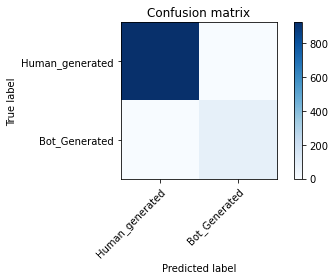

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# assuming your predicted and true labels are in y_pred and y_true arrays
# and you have a list of class names called class_names
class_names=["Human_generated","Bot_Generated"]
cm = confusion_matrix(labels_final, neural)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

